In [ ]:
#checking if GPU is alloted or not
!nvidia-smi

Sun Sep 10 10:10:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# setting Working DIR
import os
root_dir = "/content/drive/MyDrive"
working = "/content/drive/MyDrive/Colab/YOLOv8"
os.chdir(working)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

runs  Violence-Detection-1  {working}runs  yolov8n.pt  yolov8s.pt


In [ ]:
#installing ultralytics/ YOLOv8
!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

In [ ]:
  #importing libs
  import ultralytics
  ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [ ]:
#importing YOLO
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
%cd {working}

/content


In [ ]:
#Training Model
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/data.yaml epochs=25 imgsz=1500 plots=True

New https://pypi.org/project/ultralytics/8.0.173 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=1500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augme

In [ ]:
#Checking working directory
!ls {working}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2205.jpg
confusion_matrix.png				    train_batch2206.jpg
events.out.tfevents.1692987884.db34c53edba1.3847.0  train_batch2207.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


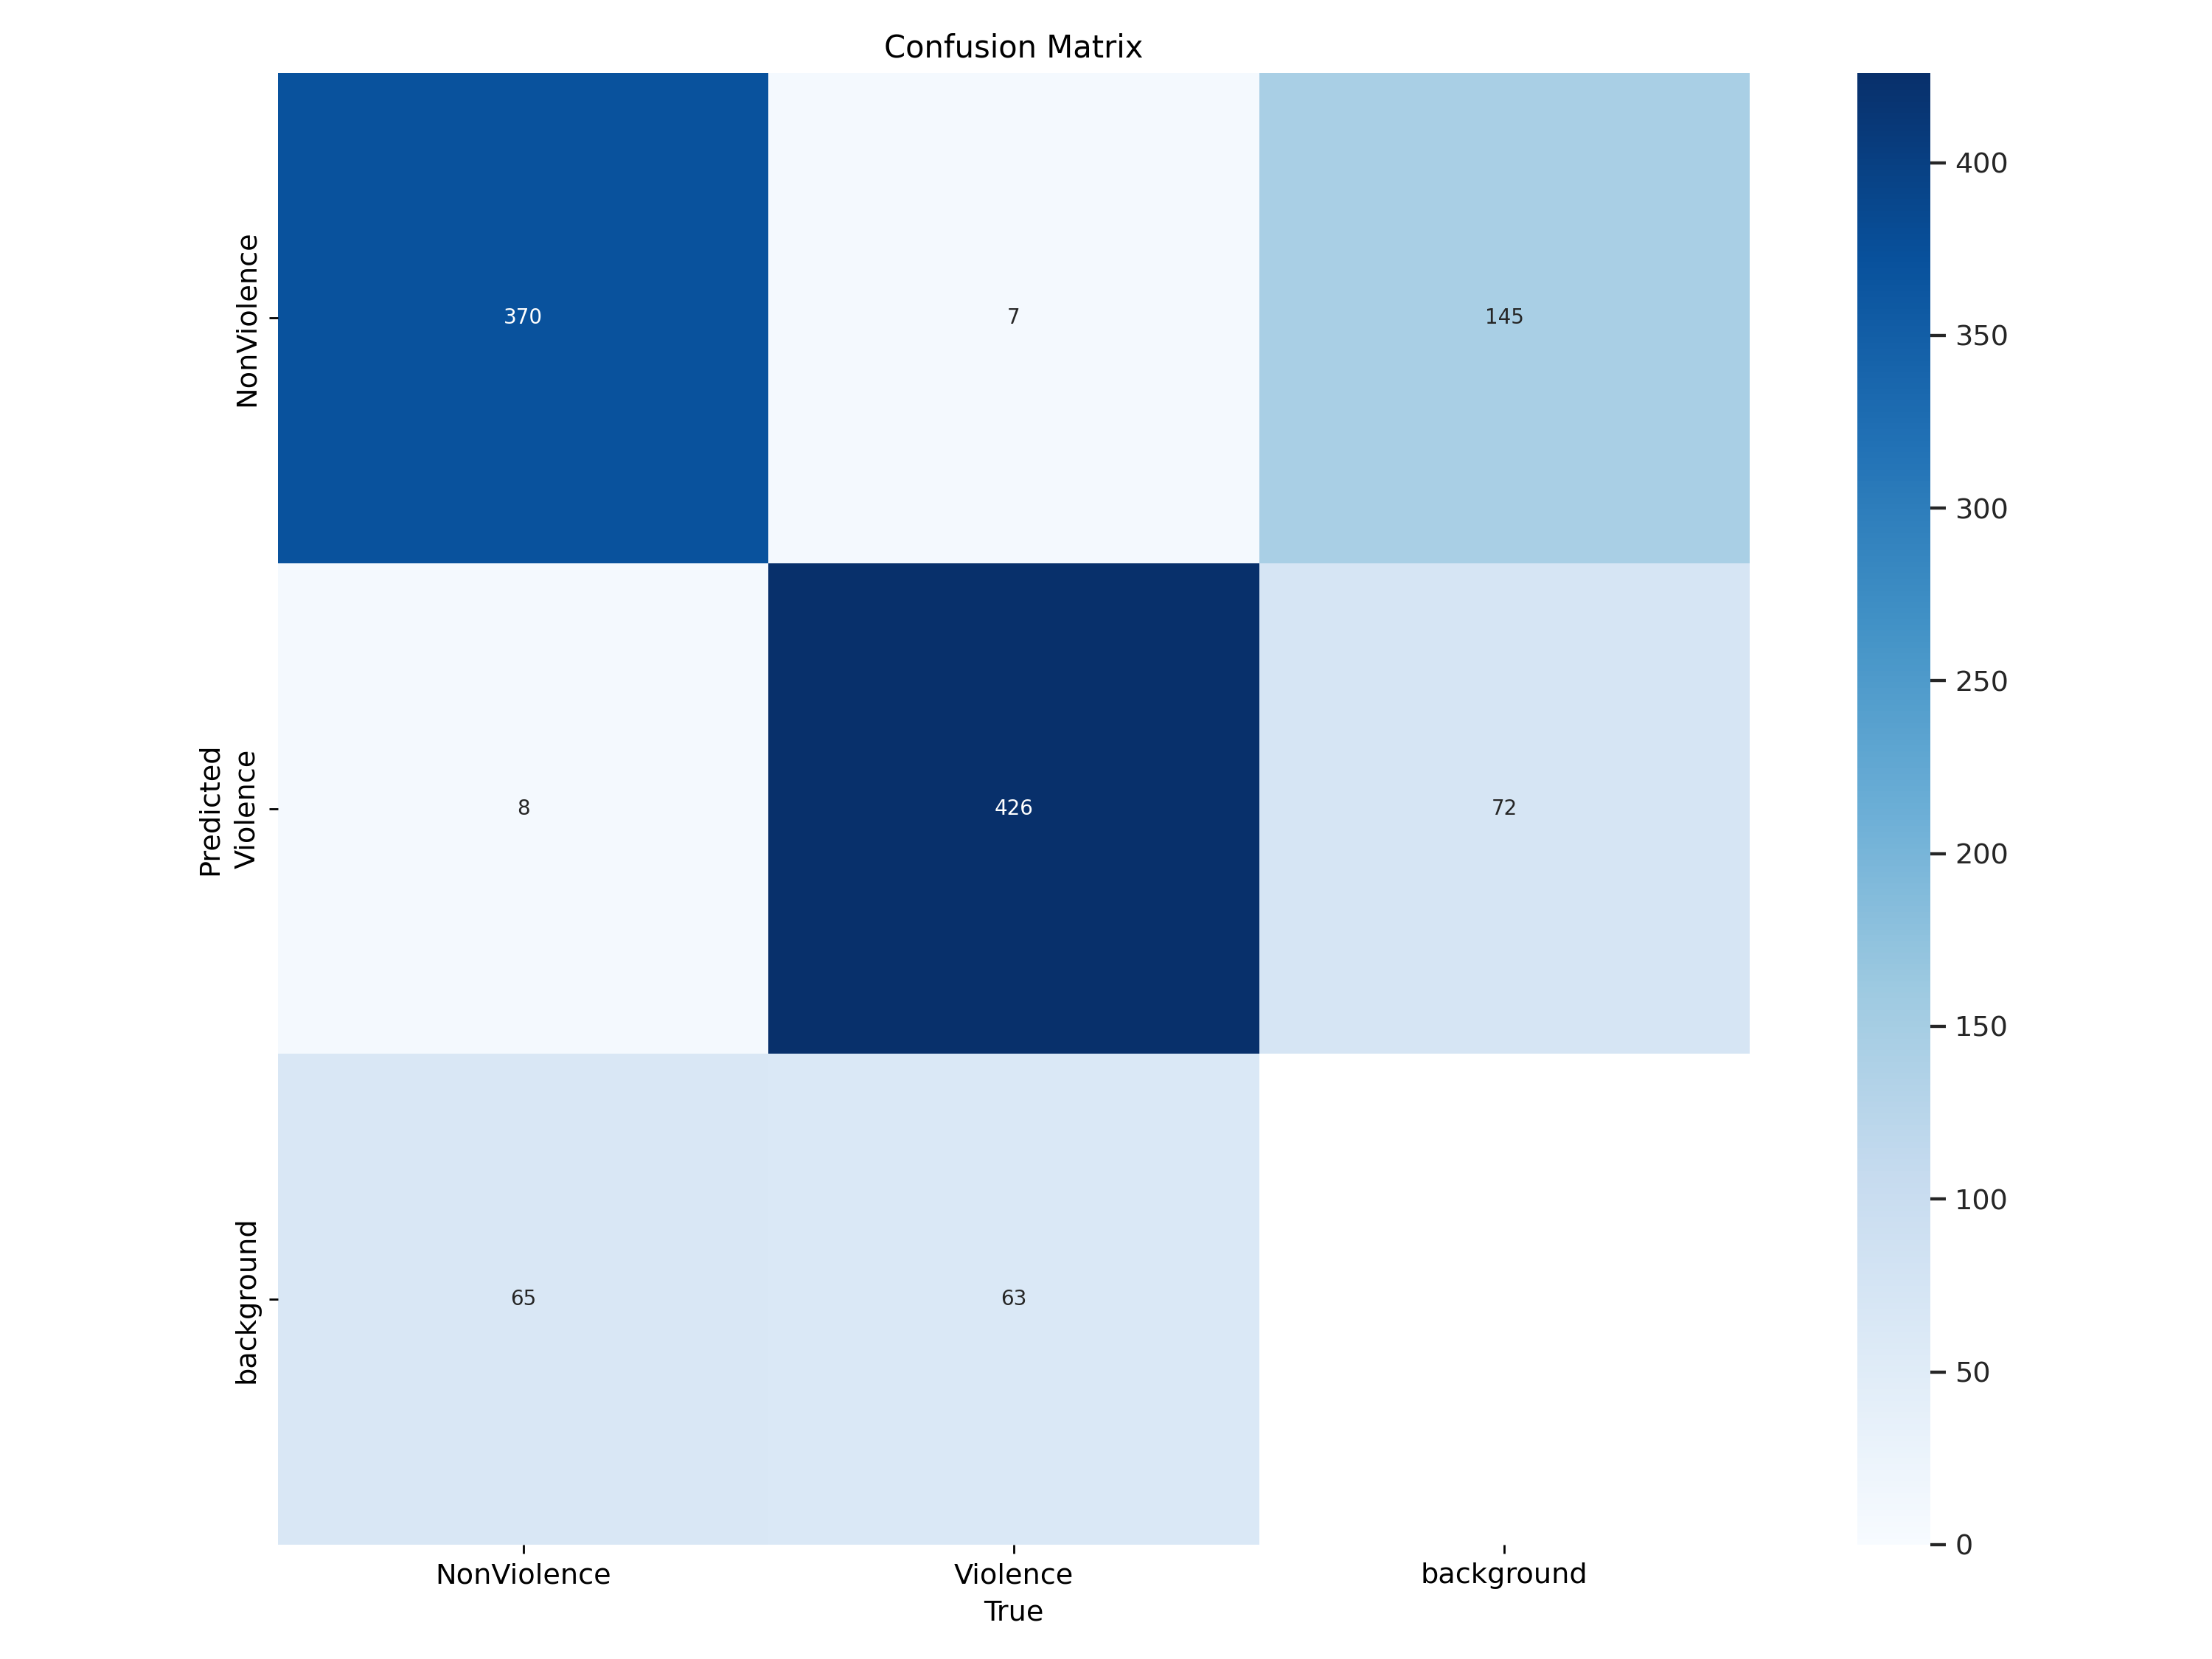

In [ ]:
from IPython.display import Image
%cd {working}
#Image(filename=f'{working}/runs/detect/train/confusion_matrix.png', width=600)
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/runs/detect/train/confusion_matrix.png',width=600)

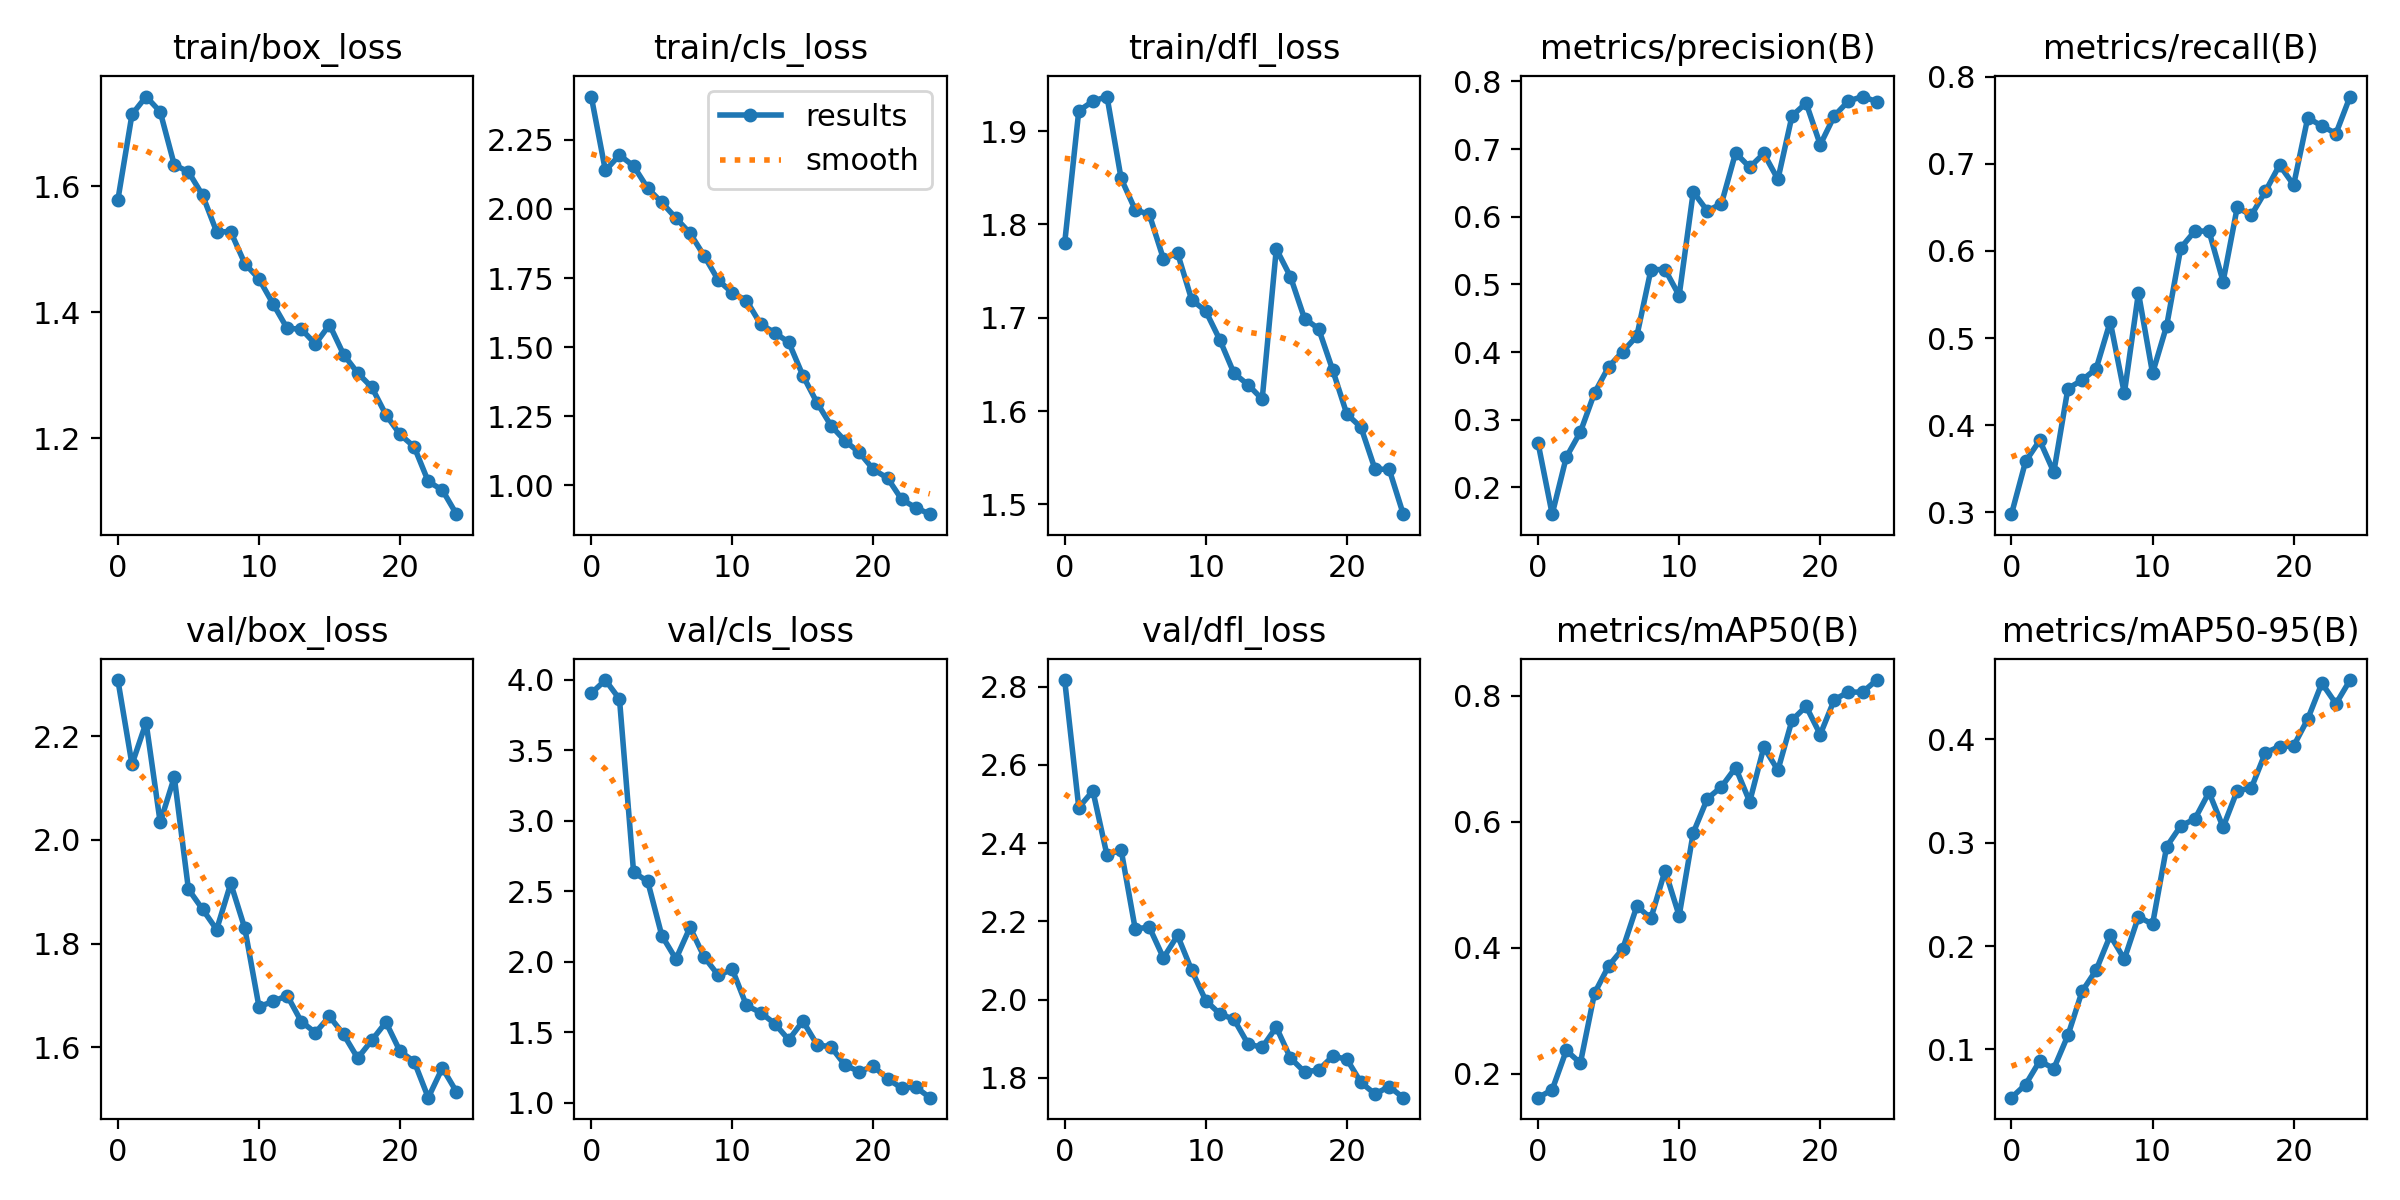

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/runs/detect/train/results.png',width=600)

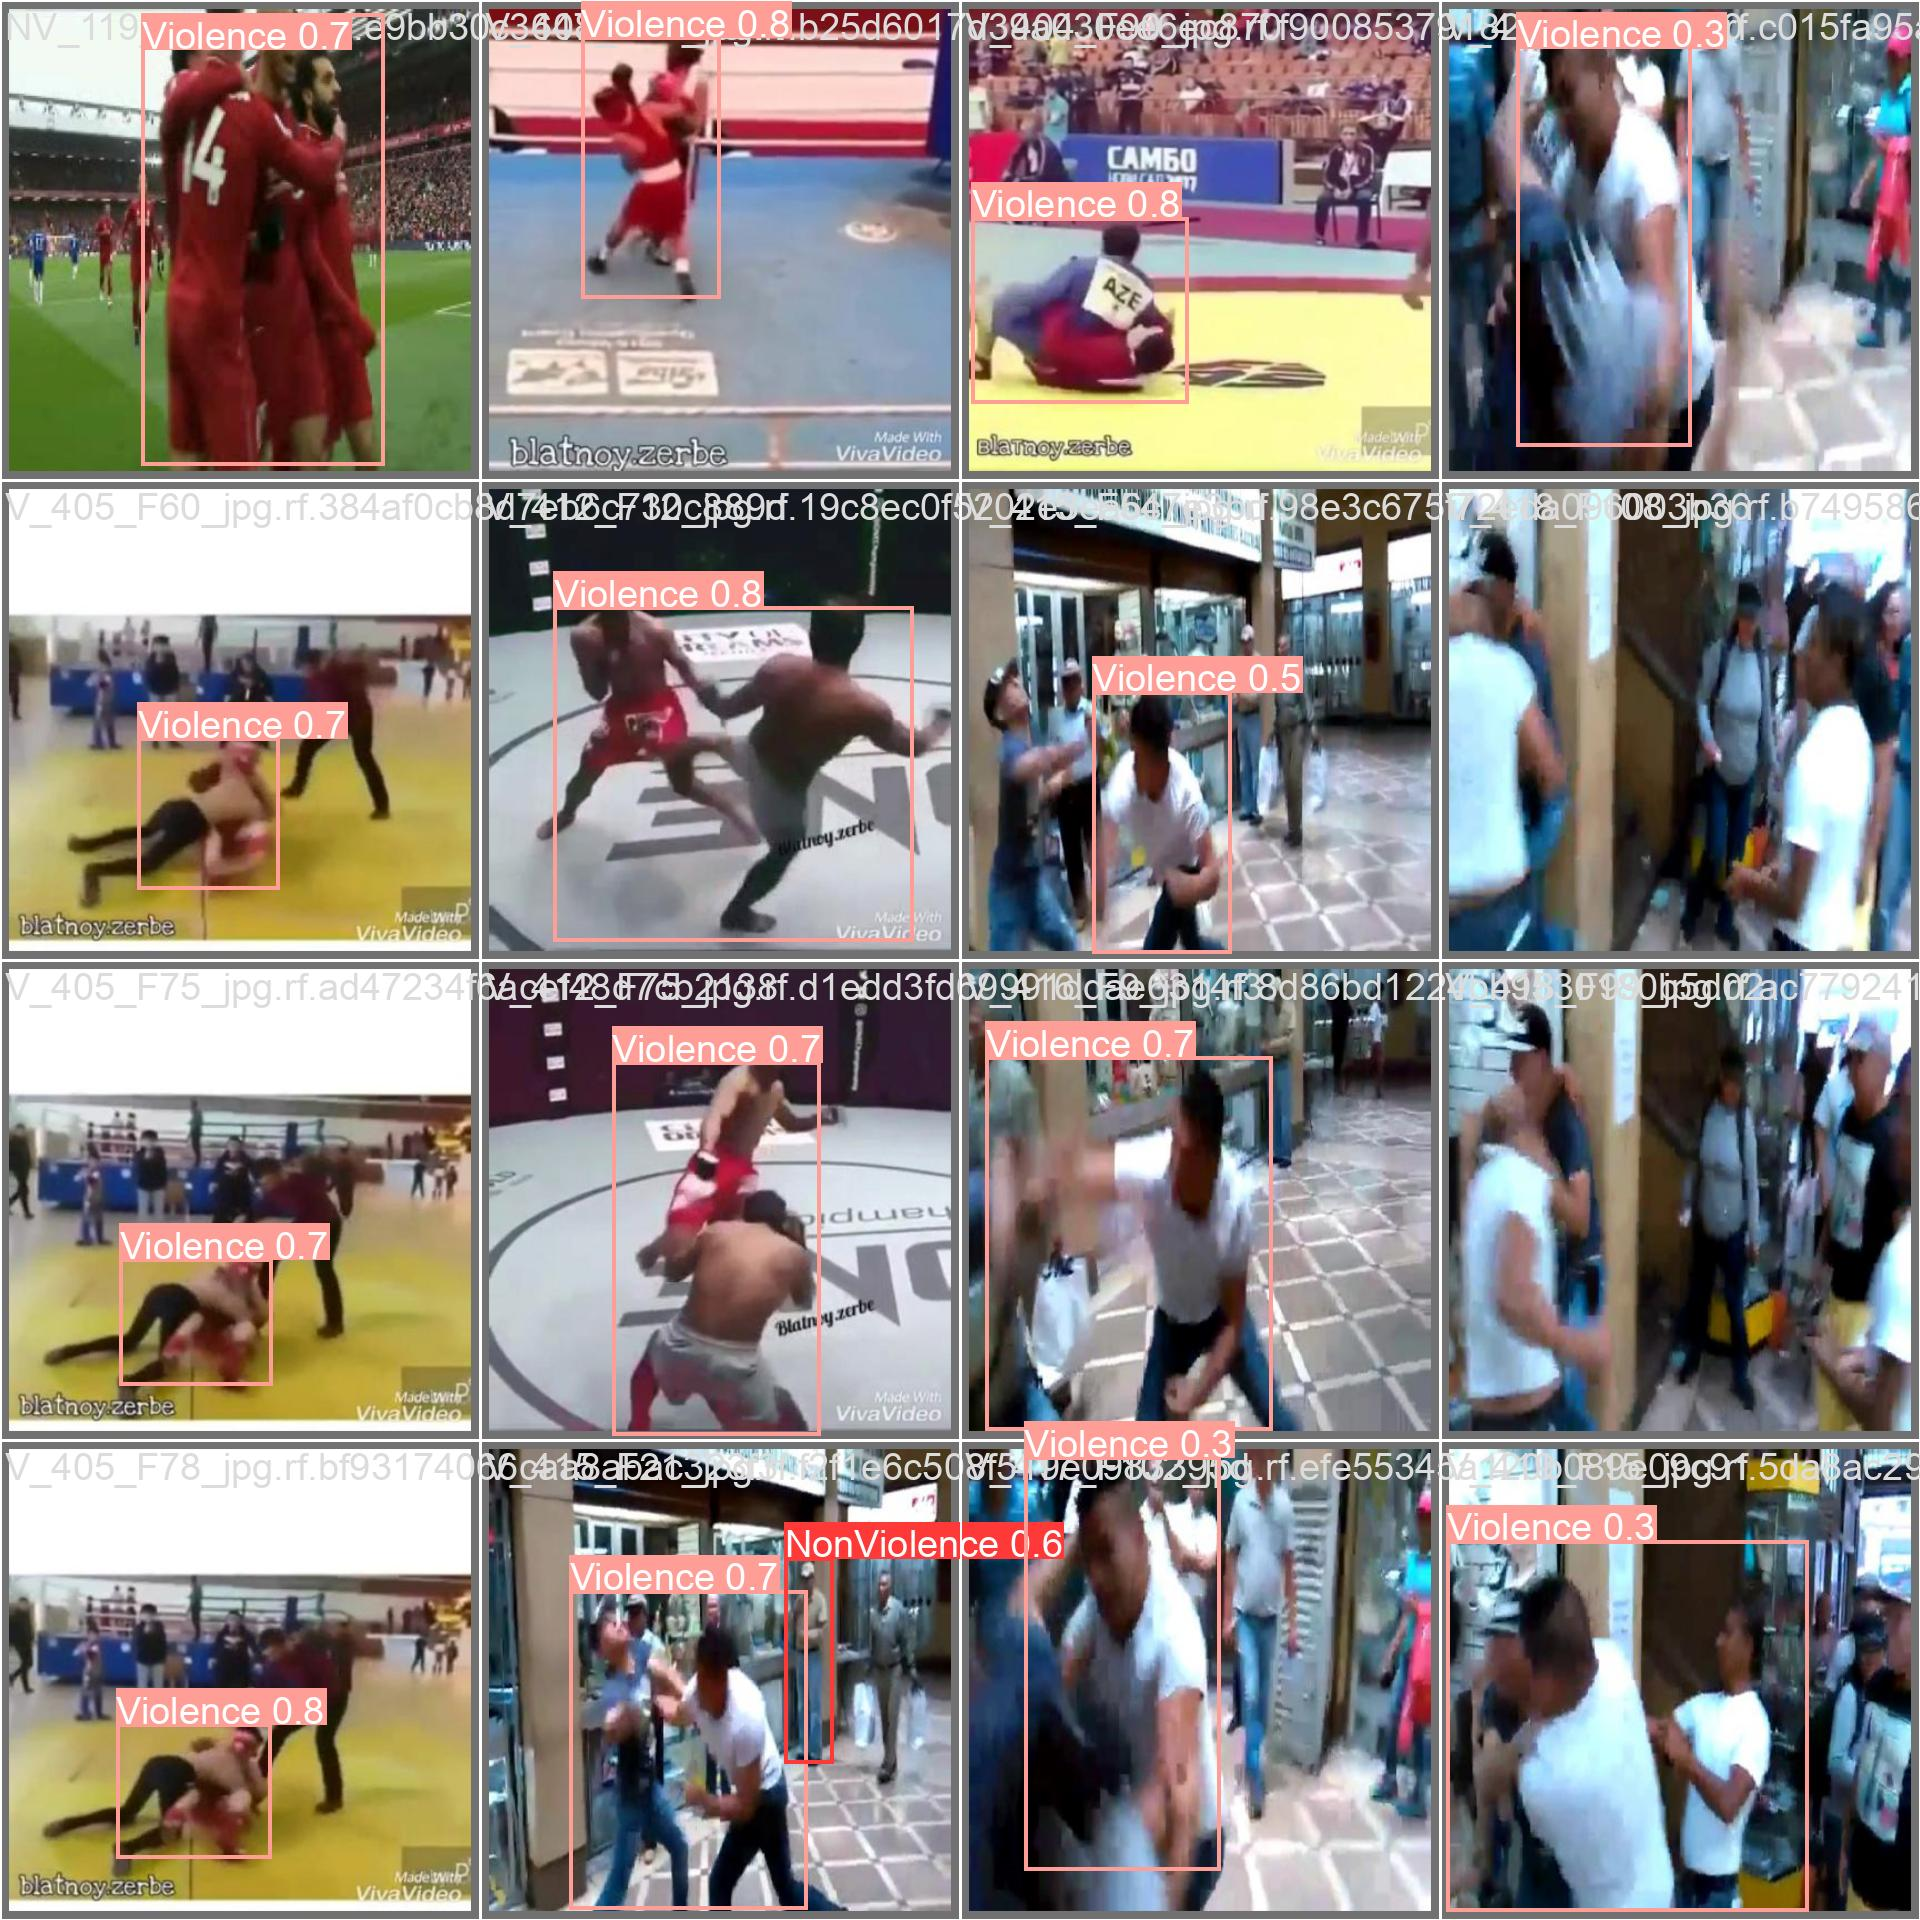

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/runs/detect/train/val_batch0_pred.jpg', width=600)

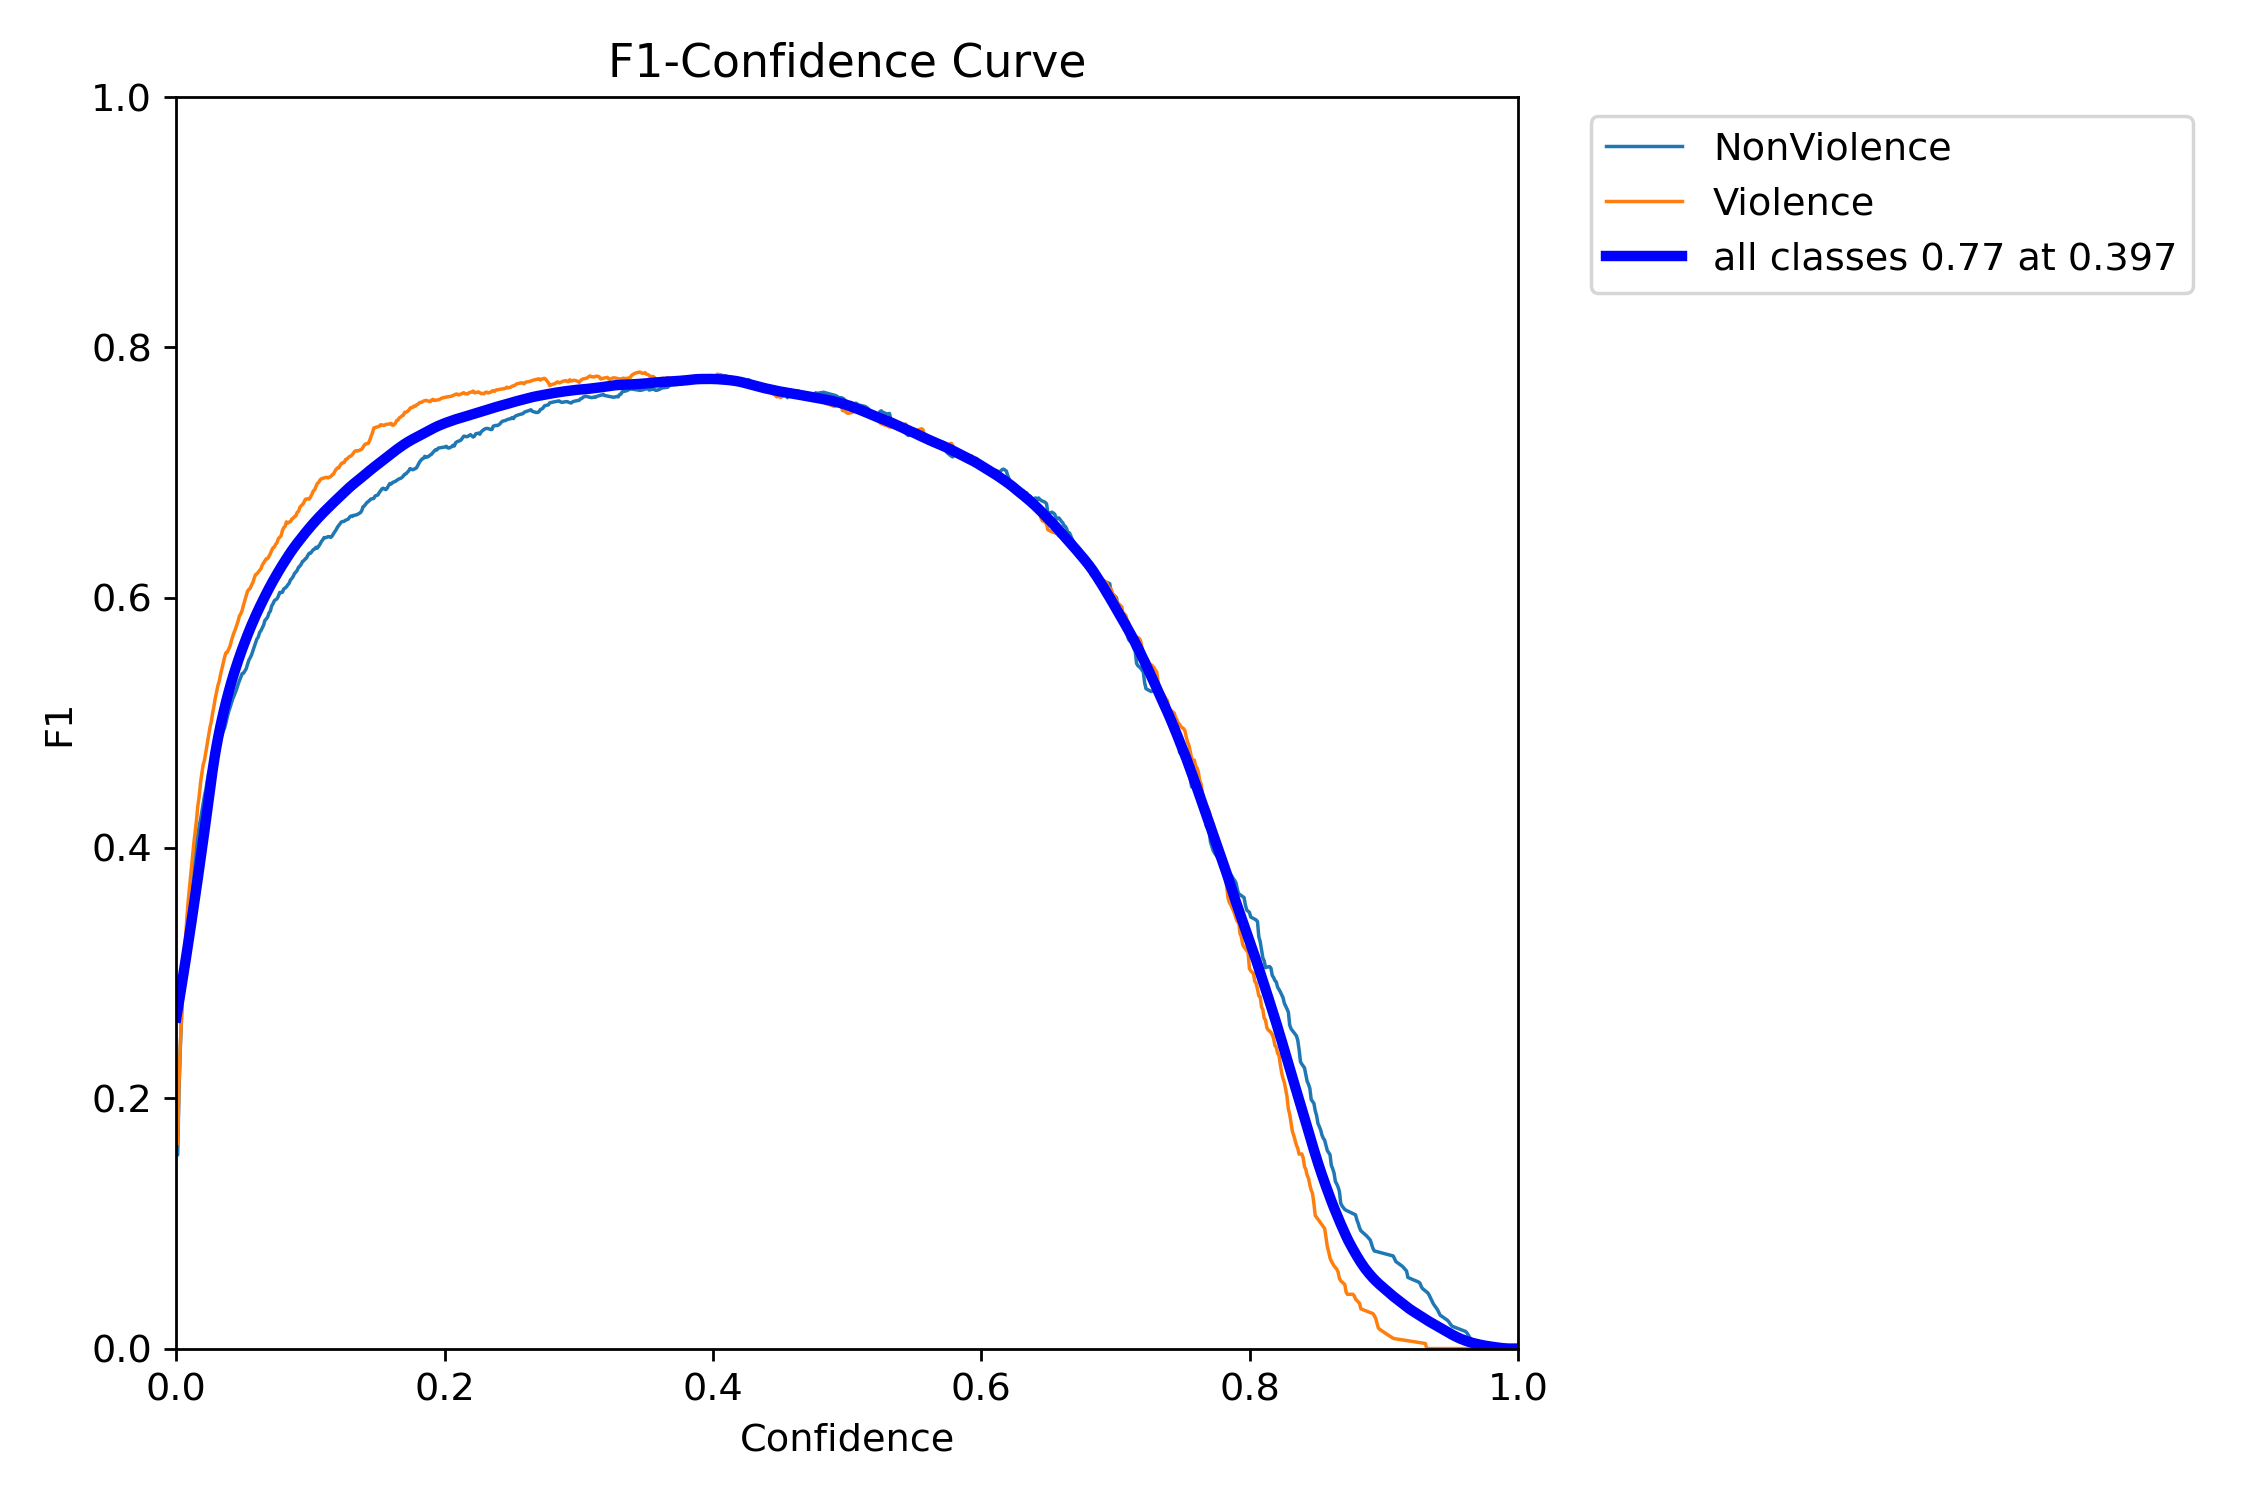

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/runs/detect/train/F1_curve.png', width=600)


In [ ]:
#VALIDATION
%cd {working}

!yolo task=detect mode=val model=/content/drive/MyDrive/Colab/YOLOv8/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/data.yaml

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/valid/labels.cache... 662 images, 123 backgrounds, 0 corrupt: 100% 662/662 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 42/42 [00:15<00:00,  2.68it/s]
                   all        662        939      0.771      0.778      0.825      0.458
           NonViolence        662        443      0.751      0.795      0.816      0.446
              Violence        662        496       0.79      0.761      0.833       0.47
Speed: 1.4ms preprocess, 12.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val4


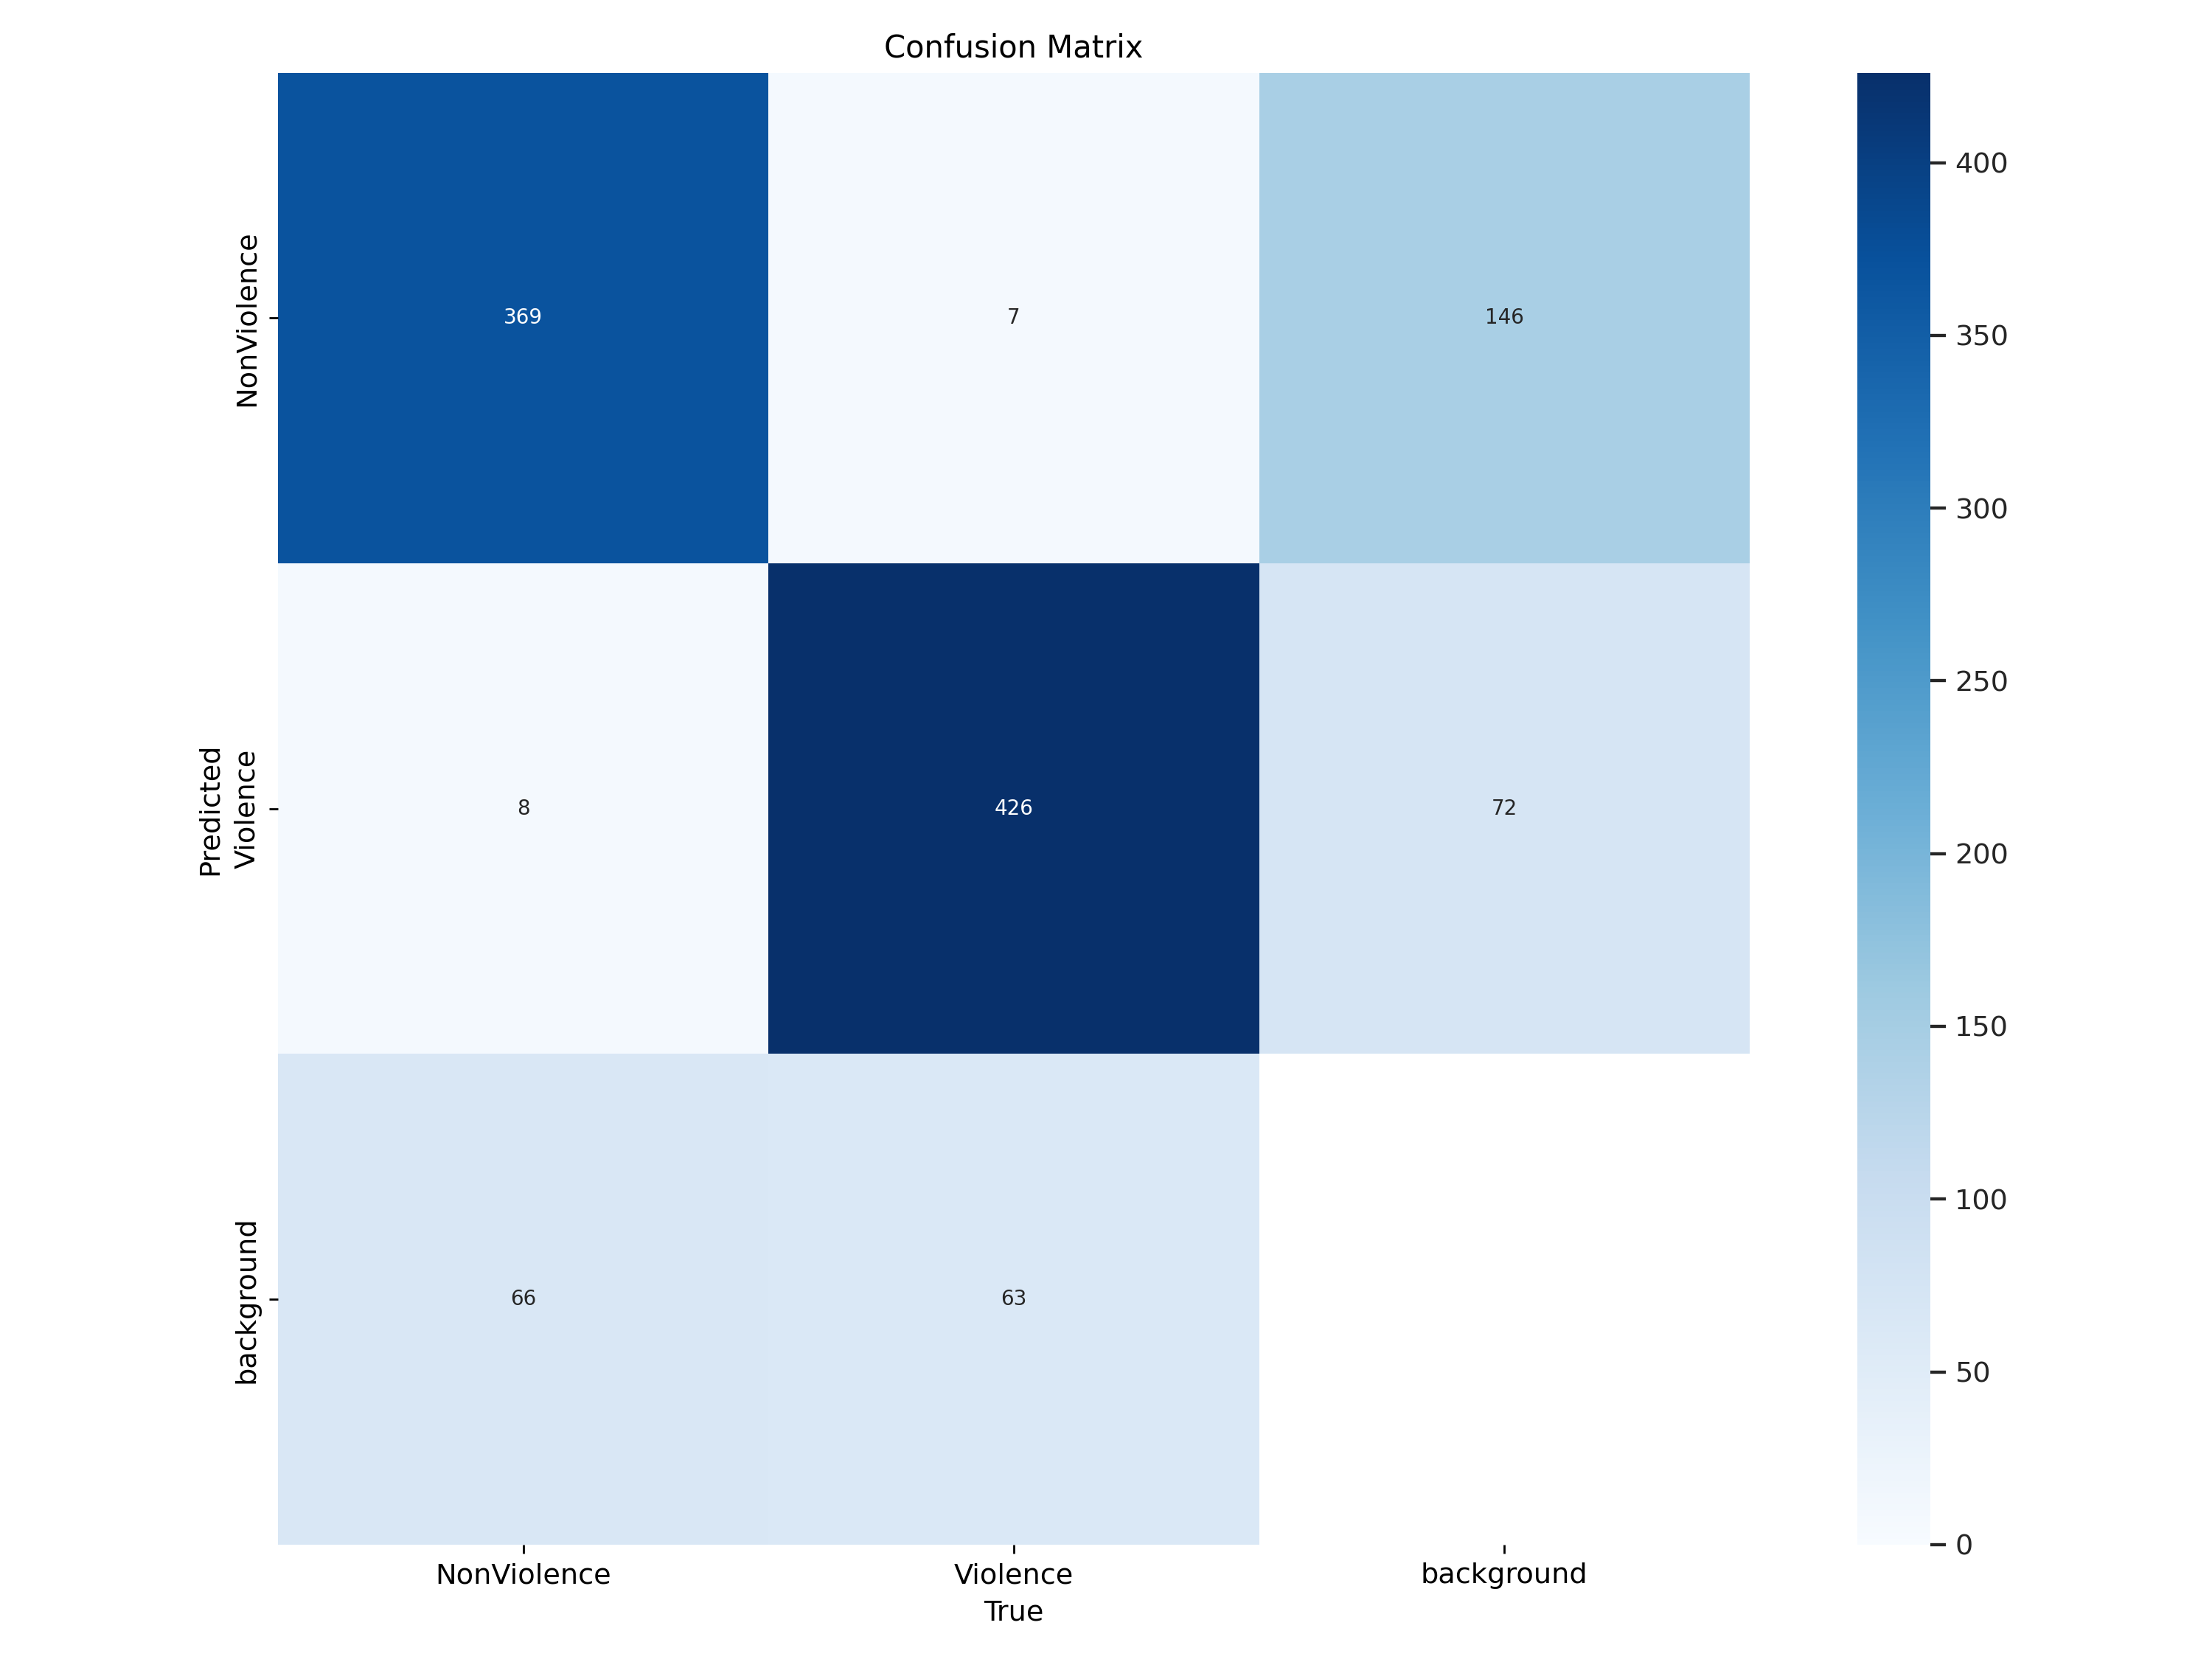

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/runs/detect/val2/confusion_matrix.png',width=600)

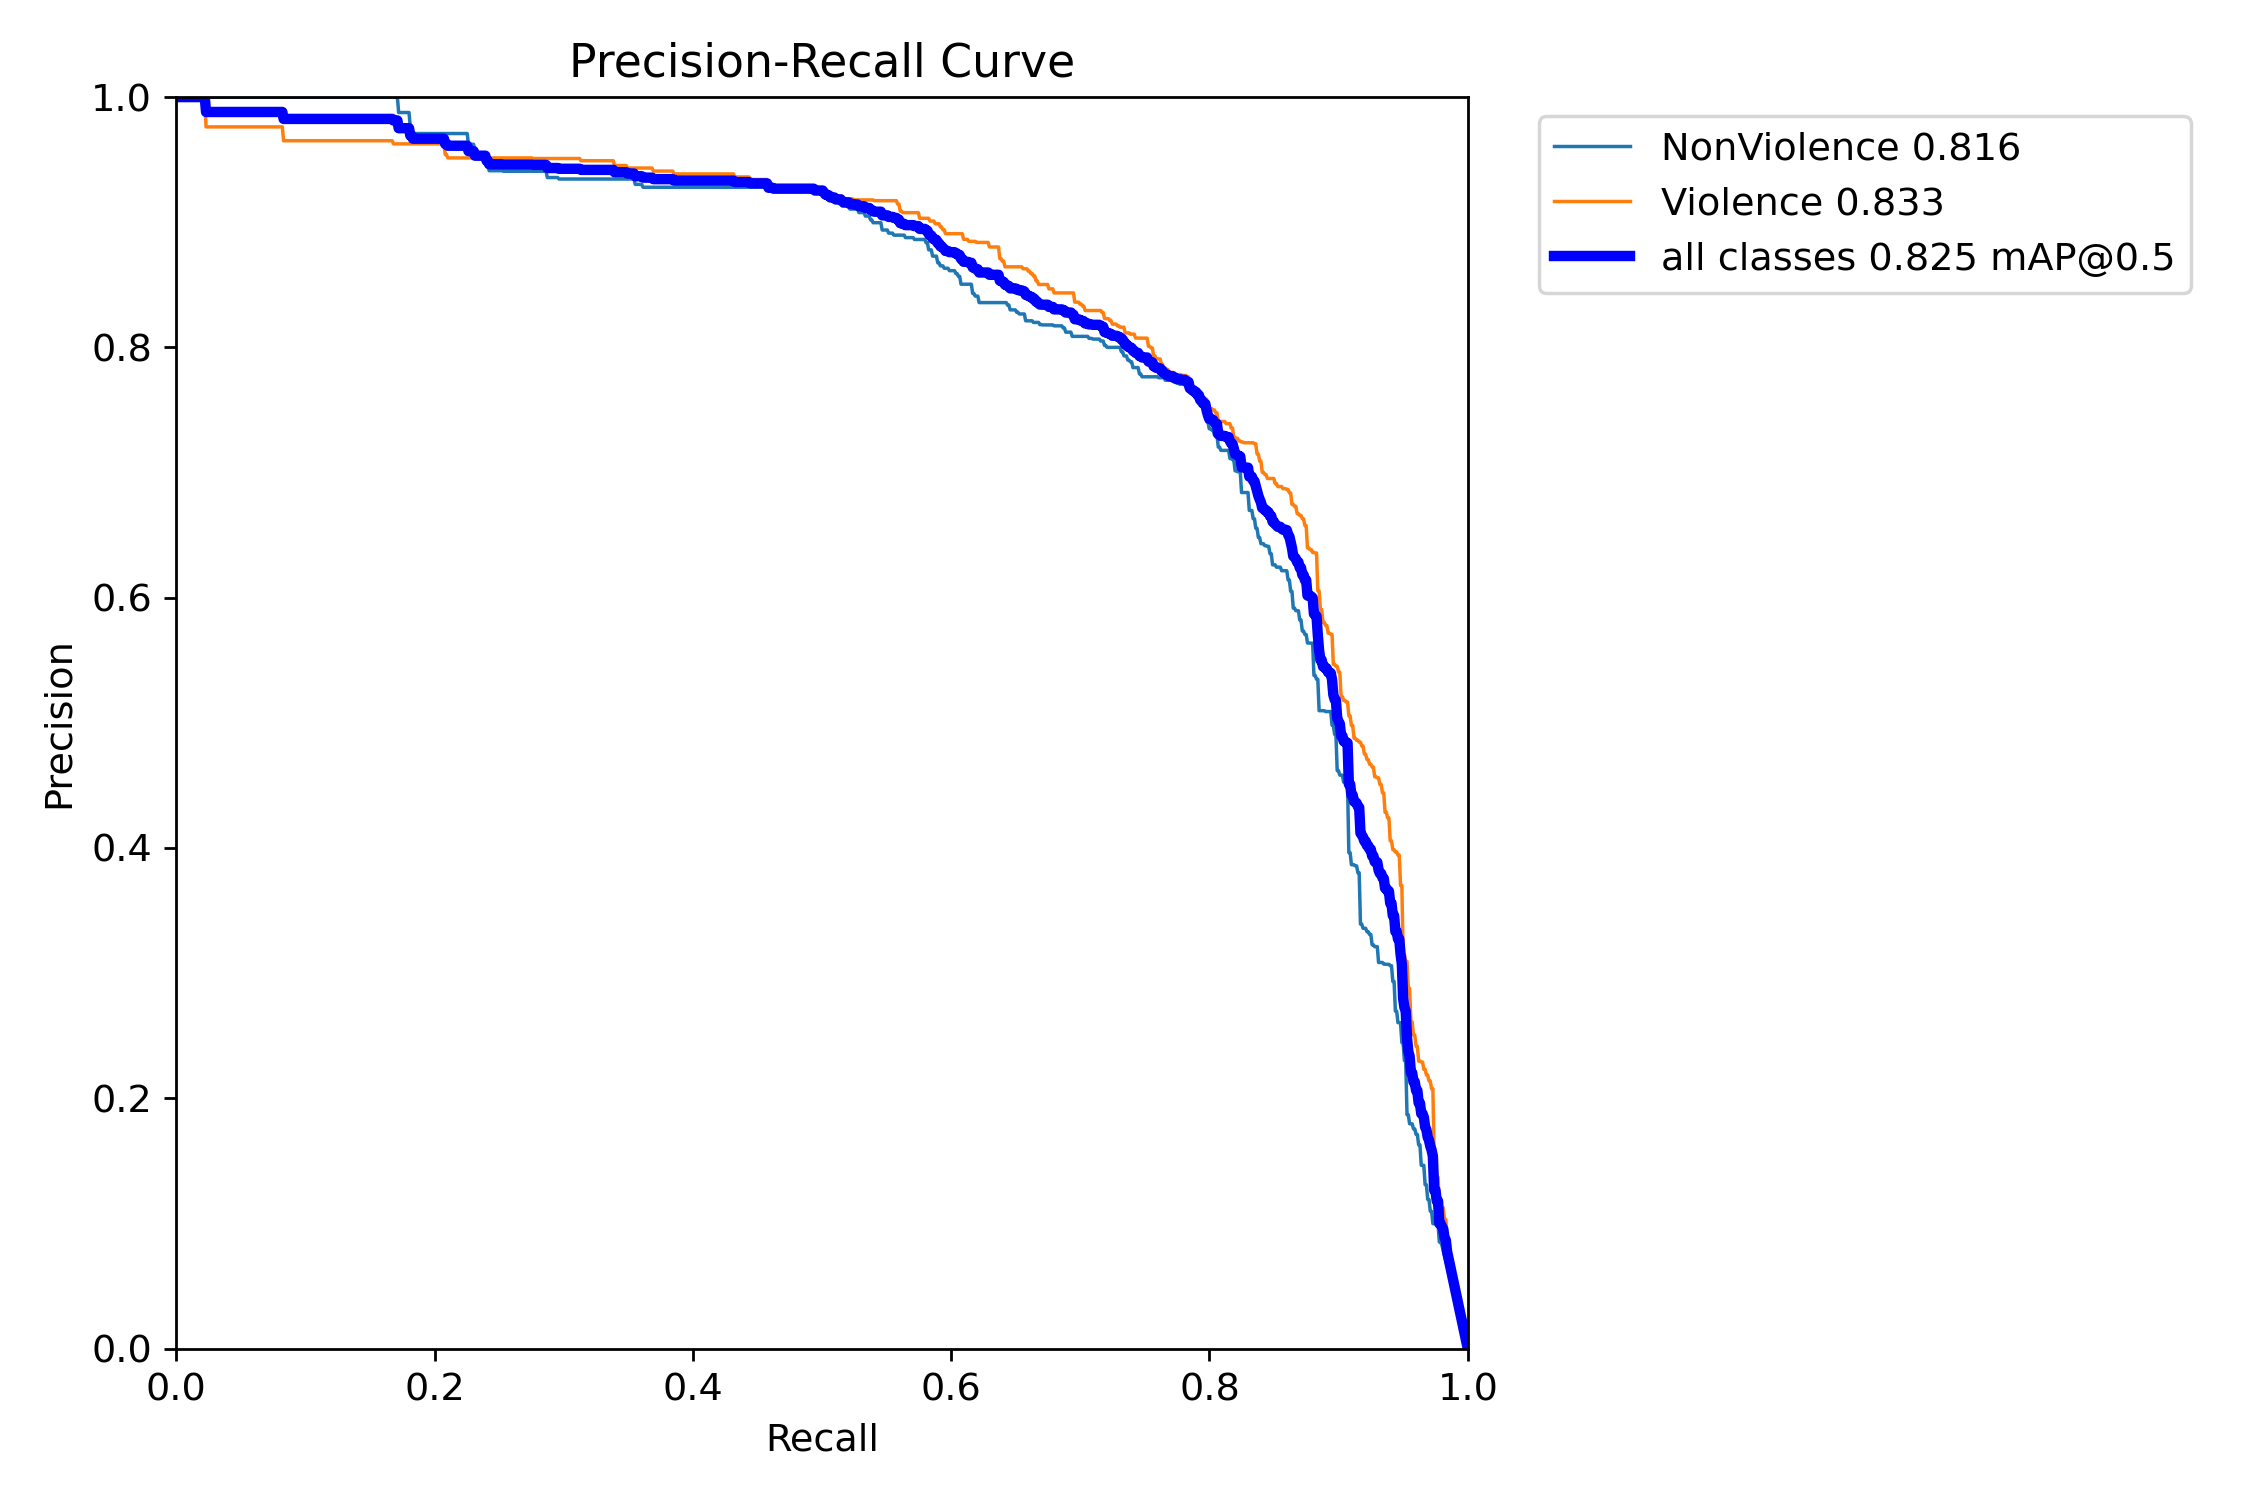

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/runs/detect/val2/PR_curve.png',width=600)

In [ ]:
#TESTING
%cd {working}
!yolo task=detect mode=predict model=/content/drive/MyDrive/Colab/YOLOv8/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/test/images save=True


/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/334 /content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/test/images/NV_118_F28_jpg.rf.b0432d9452c7a41528e17d4bb9d50a69.jpg: 800x800 2 NonViolences, 1 Violence, 24.8ms
image 2/334 /content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/test/images/NV_118_F40_jpg.rf.fee2a2f5c2ef147c4c1afc9e1b59a6c6.jpg: 800x800 1 NonViolence, 1 Violence, 24.7ms
image 3/334 /content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/test/images/NV_118_F60_jpg.rf.b213c85a9757d79bda981b0109c70042.jpg: 800x800 2 NonViolences, 24.7ms
image 4/334 /content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/test/images/NV_118_F80_jpg.rf.5f026eb4e5fa11b1a988698804795889.jpg: 800x800 1 NonViolence, 29.3ms
image 5/334 /content/drive/MyDrive/Colab/YOLOv8/Violence-Detection-1/test/images/NV_137_F44_jpg.rf.52e007b0a2269ae356d2796710cf60a2.jpg: 800

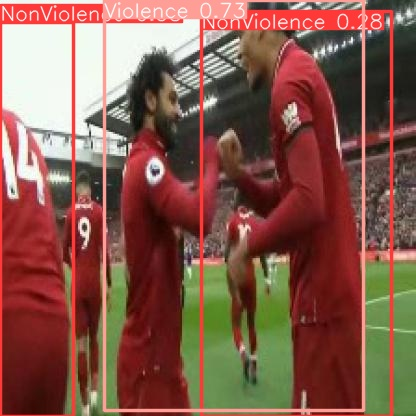

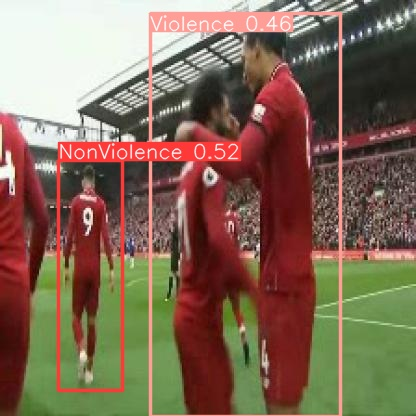

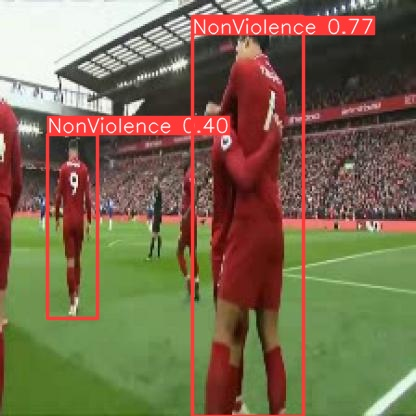

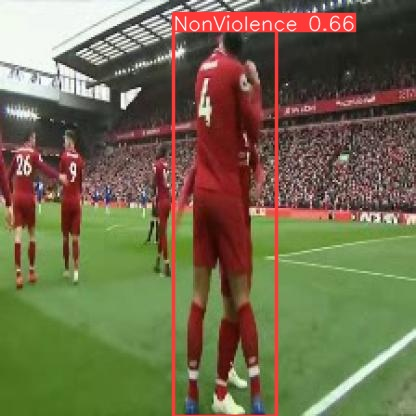

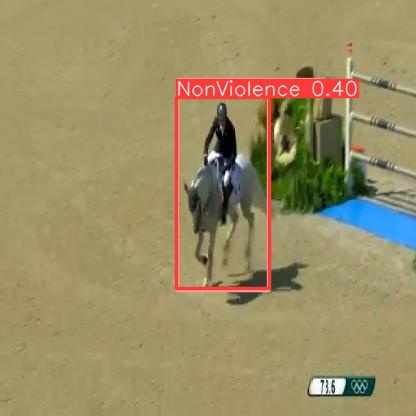

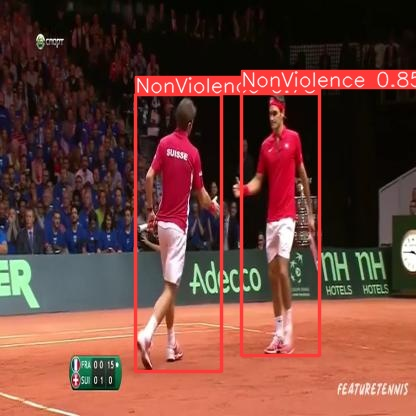

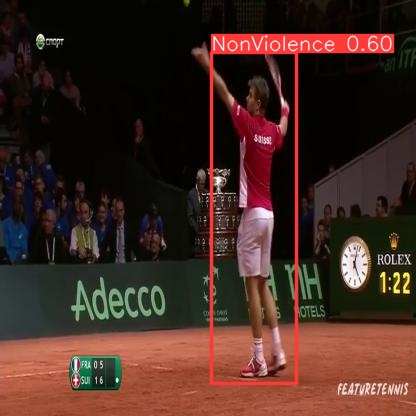

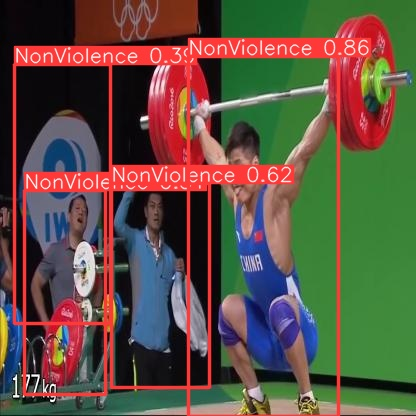

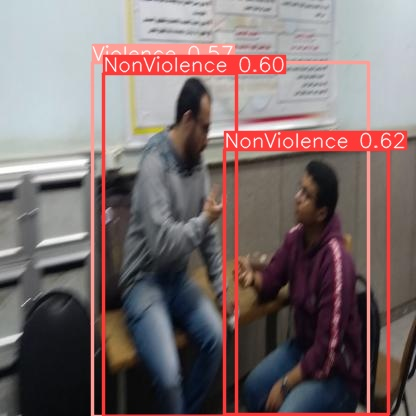

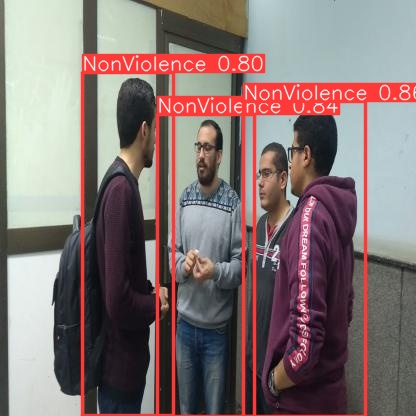

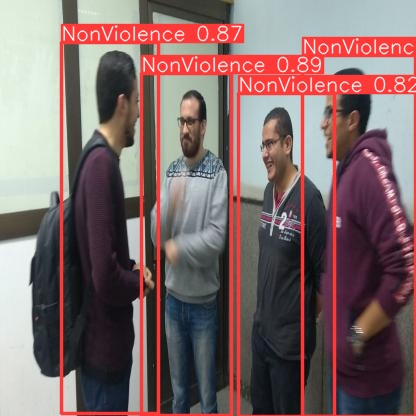

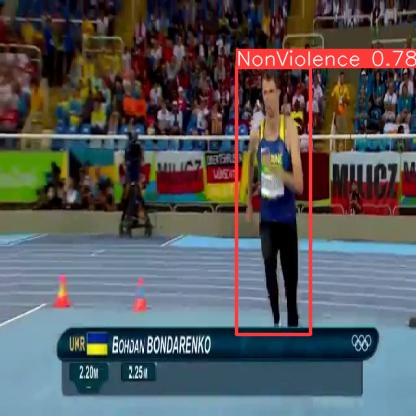

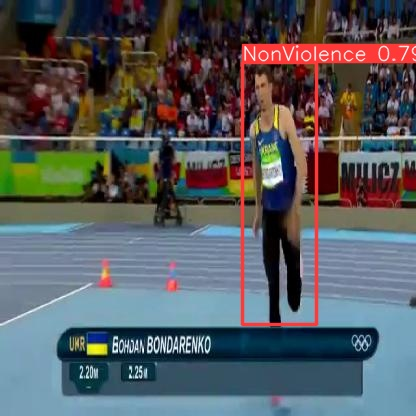

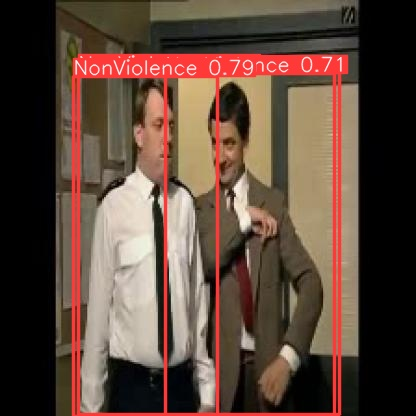

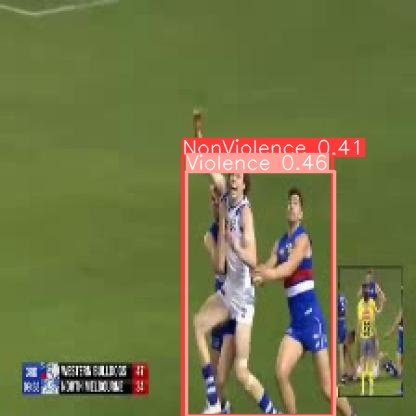

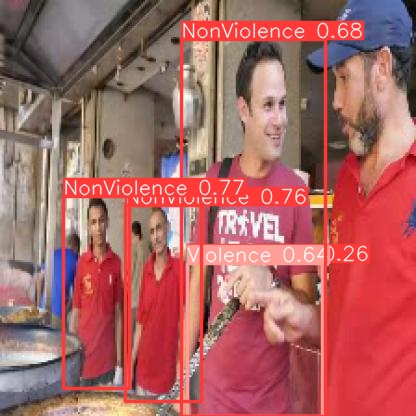

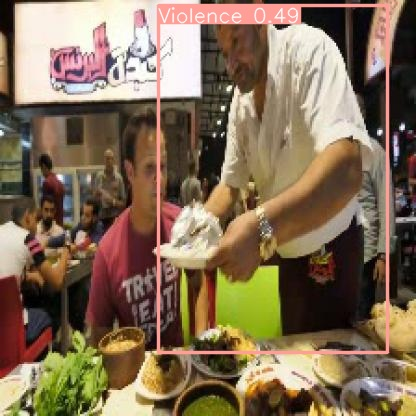

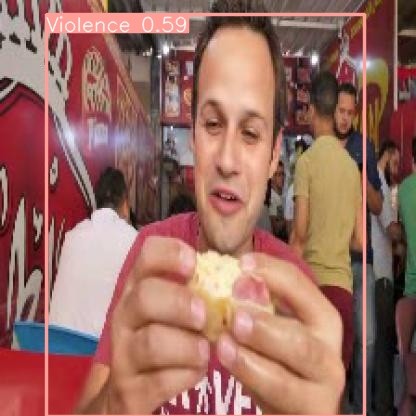

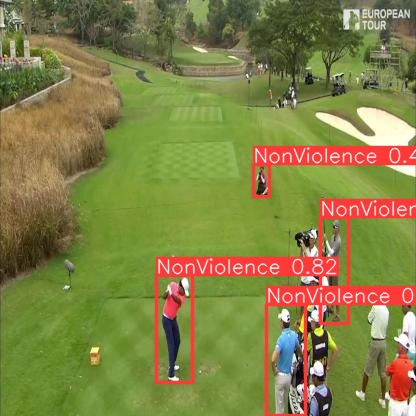

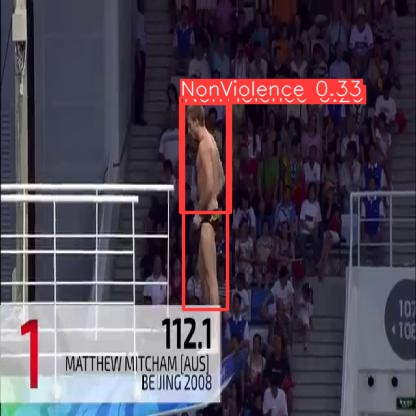

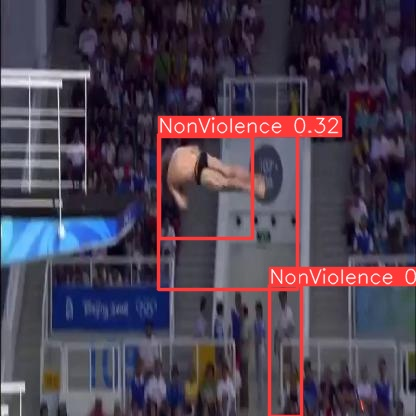

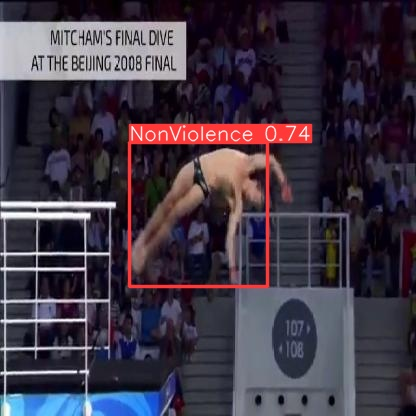

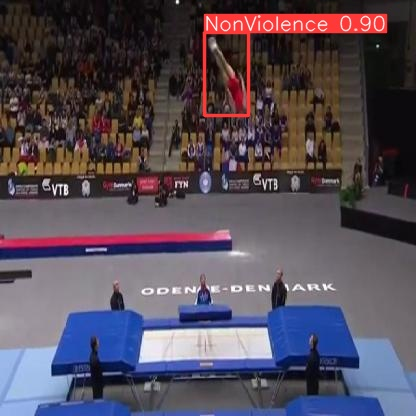

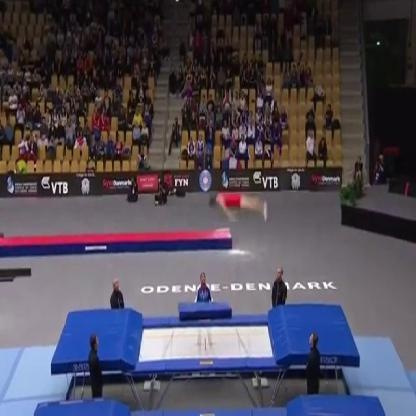

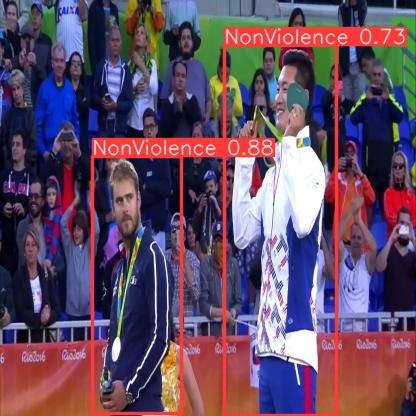

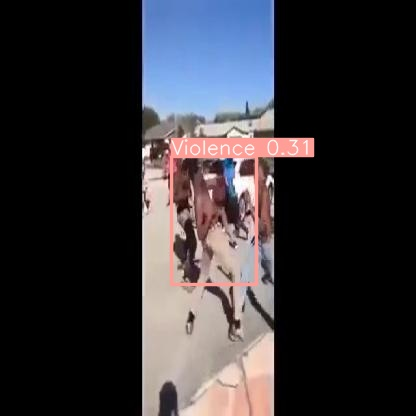

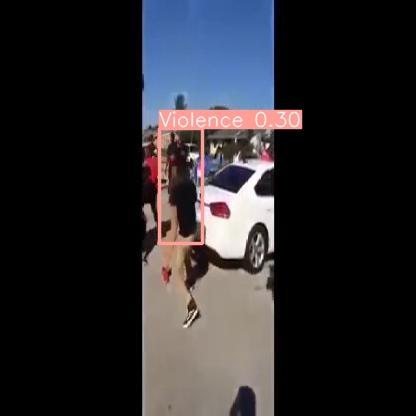

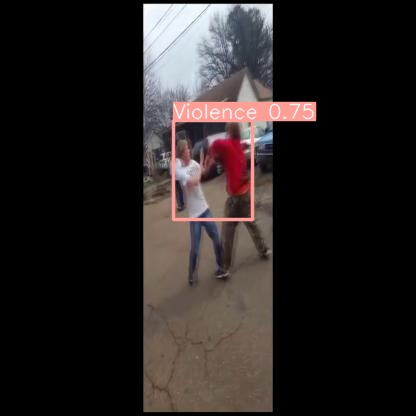

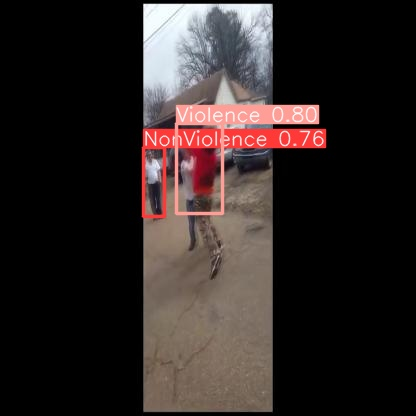

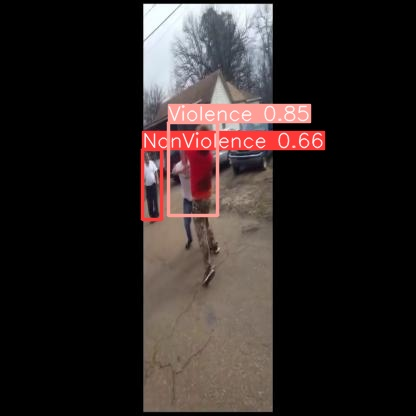

In [ ]:
#Model prediction or detection
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/Colab/YOLOv8/runs/detect/predict/*.jpg')[:30]:
      display(Image(filename=image_path, width=600))
      print("\n")